# Energy Spectrum analysis of the first Radon Injection

_23/06/2021_

The aim of this analysis is to perform a first Energy Calibration of GXe data in XAMSL. We will look at coincident events where both the PMTs have triggered a signal in the same time window.

We will follow the same procedure showed in this Wikipage: https://wiki.nikhef.nl/xenon/doku.php?id=serena:first_results_xamsl

The measurements that will be used are from ``Run 000136`` to ``Run 000141``. The complete database can be found here: https://wiki.nikhef.nl/xenon/doku.php?id=xamsl:1st_gxe_measurements.

**TO-DO** : 

- I will do the analysis for just one run (139), you will need to do it for 140 and 141
- Make the plots nicer than mine!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numba
import os
import pickle
from datetime import datetime
from IPython import display
from matplotlib.colors import LogNorm

## Data structure

For this analysis we will only use the ``peaks`` and ``peak_basics`` data kind, which contains high-level processed data.

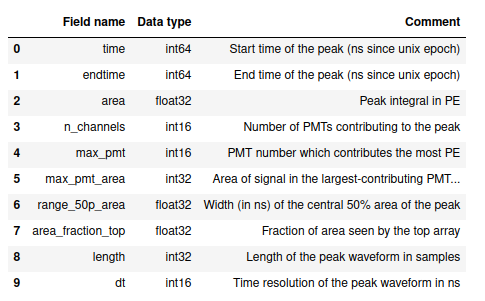

In [2]:
# Uncomment the line of the data-structure you want to look the fields of

#display.Image("./raw_records.png")
#display.Image("./records.png")
#display.Image("./data_structure_peaks.png")
display.Image("./peak_basics.png")

## Load the data

In [3]:
# Read the pickle file
# pickefile_rr136 = open('raw_records_000136', 'rb')
# picklefile_rec136 = open('records_000136', 'rb')
picklefile_p136 = open('peaks_000136', 'rb')
picklefile_pb136 = open('peak_basics_000136', 'rb')

# pickefile_rr137 = open('raw_records_000137', 'rb')
# picklefile_rec137 = open('records_000137', 'rb')
picklefile_p137 = open('peaks_000137', 'rb')
picklefile_pb137 = open('peak_basics_000137', 'rb')

# pickefile_rr139 = open('raw_records_000139', 'rb')
# picklefile_rec139 = open('records_000139', 'rb')
picklefile_p139 = open('peaks_000139', 'rb')
picklefile_pb139 = open('peak_basics_000139', 'rb')

# pickefile_rr140 = open('raw_records_000140', 'rb')
# picklefile_rec140 = open('records_000140', 'rb')
picklefile_p140 = open('peaks_000140', 'rb')
picklefile_pb140 = open('peak_basics_000140', 'rb')

# pickefile_rr141 = open('raw_records_000141', 'rb')
# picklefile_rec141 = open('records_000141', 'rb')
picklefile_p141 = open('peaks_000141', 'rb')
picklefile_pb141 = open('peak_basics_000141', 'rb')

# Unpickle the dataframe (load the data) here: only peak_basics

peaks_000136 = pickle.load(picklefile_p136)
peak_basics_000136 = pickle.load(picklefile_pb136)
peaks_000137 = pickle.load(picklefile_p137)
peak_basics_000137 = pickle.load(picklefile_pb137)
peaks_000139 = pickle.load(picklefile_p139)
peak_basics_000139 = pickle.load(picklefile_pb139)
peaks_000140 = pickle.load(picklefile_p140)
peak_basics_000140 = pickle.load(picklefile_pb140)
peaks_000141 = pickle.load(picklefile_p141)
peak_basics_000141 = pickle.load(picklefile_pb141)

# Close file

picklefile_p136.close()
picklefile_pb136.close()
picklefile_p137.close()
picklefile_pb137.close()
picklefile_p139.close()
picklefile_pb139.close()
picklefile_p140.close()
picklefile_pb140.close()
picklefile_p141.close()
picklefile_pb141.close()

## 1. Monitor the rate over time in a single run

Here we compare the background run 136 with the run 137 when we open the radium-226 source and the rn-222 started to diffuse in our detector. You can also have a look at the other runs if you want. 

Some comments:
   - Both PMTs were at 800V (negative polarity) for 000136 and 000137 (look at the database on the Wiki!)
   - PMTs are at 650V (negative polarity) for all the other runs
   - Calculate the length of the run as shown below and then think about the binning in the plot, is it good? 
   - How much is the event rate increase between run 136 and run 137?
   - Monitor the rate for the other runs and draw some conclusions!

In [4]:
# Calculate the run length 

run_length = peak_basics_000136['time'][-1]*1e-9 - peak_basics_000136['time'][0]*1e-9 # ns
run_length_m = run_length/60 # sec
print(f'Run 136 length: {run_length_m} minutes')

Run 136 length: 13.329253676166669 minutes


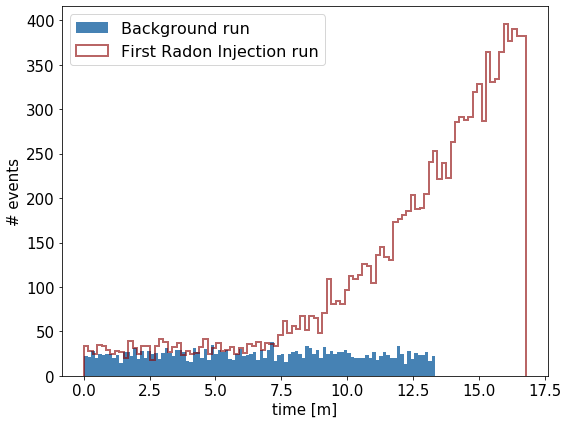

In [5]:
fig = plt.figure(figsize=(8,6))
plt.hist(peak_basics_000136['time']*1e-9/60,bins = 100, linewidth = 4, color = 'steelblue', label='Background run')
plt.hist(peak_basics_000137['time']*1e-9/60,bins = 100, histtype='step', linewidth = 2, color = 'darkred', alpha=0.6,  label='First Radon Injection run')

plt.xlabel('time [m]', fontsize=15)
plt.ylabel('# events', fontsize=15)

# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.ylim(0,50)

plt.legend(loc = 'upper left', fontsize=16)

# plt.savefig("first_injection.png")
plt.tight_layout()

plt.show()

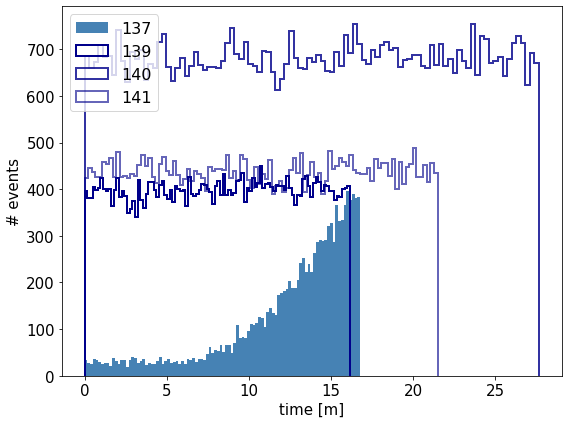

In [6]:
fig = plt.figure(figsize=(8,6))

plt.hist(peak_basics_000137['time']*1e-9/60,bins = 100, linewidth = 2, color = 'steelblue', label='137')
plt.hist(peak_basics_000139['time']*1e-9/60,bins = 100,  histtype='step', linewidth = 2, color = 'darkblue', label='139')
plt.hist(peak_basics_000140['time']*1e-9/60,bins = 100, histtype='step', linewidth = 2, color = 'darkblue', alpha=0.8,  label='140')
plt.hist(peak_basics_000141['time']*1e-9/60,bins = 100, histtype='step', linewidth = 2, color = 'darkblue', alpha=0.6,  label='141')

plt.xlabel('time [m]', fontsize=15)
plt.ylabel('# events', fontsize=15)

# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(loc = 'upper left', fontsize=16)

# plt.savefig("first_injection.png")
plt.tight_layout()

plt.show()

## 2. Energy Spectrum

It is the integrated area (energy) of the recorded signal from both PMTs added up (both channel 0 and channel 1).

Compare the energy spectrum to each other! What can we learn?

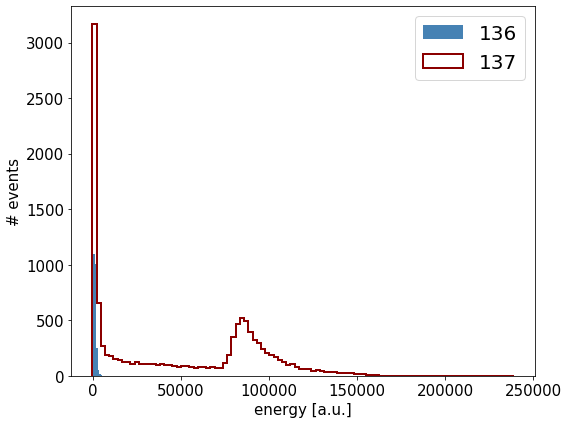

In [7]:
fig = plt.figure(figsize=(8,6))

plt.hist(peak_basics_000136['area'],bins = 100, linewidth = 2, color = 'steelblue', label='136')
plt.hist(peak_basics_000137['area'],bins = 100,  histtype='step', linewidth = 2, color = 'darkred', label='137')

plt.xlabel('energy [a.u.]', fontsize=15)
plt.ylabel('# events', fontsize=15)

# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(loc = 'upper right', fontsize=20)

# plt.savefig("first_injection.png")
plt.tight_layout()

plt.show()

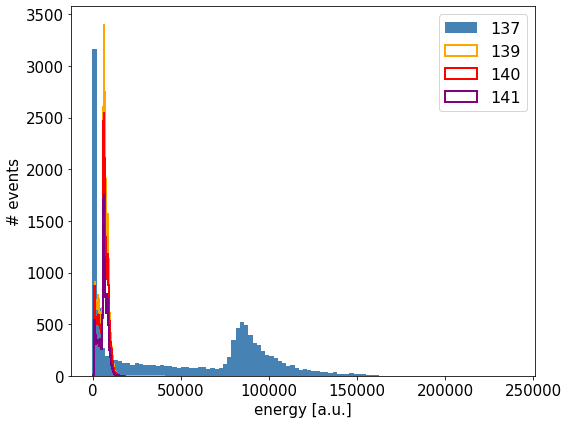

In [8]:
fig = plt.figure(figsize=(8,6))

plt.hist(peak_basics_000137['area'],bins = 100, linewidth = 2, color = 'steelblue', label='137')
plt.hist(peak_basics_000139['area'],bins = 150,  histtype='step', linewidth = 2, color = 'orange', label='139')
plt.hist(peak_basics_000140['area'],bins = 150, histtype='step', linewidth = 2, color = 'red',  label='140')
plt.hist(peak_basics_000141['area'],bins = 150, histtype='step', linewidth = 2, color = 'purple',  label='141')

plt.xlabel('energy [a.u.]', fontsize=15)
plt.ylabel('# events', fontsize=15)

# plt.xlim(0,20000)

# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(loc = 'upper right', fontsize=16)

# plt.savefig("first_injection.png")
plt.tight_layout()

plt.show()

As you can see from above, the runs ``139``-``141`` look completely different from ``137``. This is because of the different applied voltage on the PMTs. For run ``137`` the HV = -800V, for all the other is -650V. 

If you want to compare them, you should find the amplification factor by comparing the guessed Rn-222 peak that you see for run 137 at ~70000 a.u. (we would need a fit here to know the precise value) and the guessed Rn-222 peak of one of the other run.

Take into account that also the Background run ``136`` is not comparable with the run after ``137`` because of the same reason. 

In the plot below, you see the spectrum of the three runs, where the second peak is starting to build up, while it was no present in ``137.

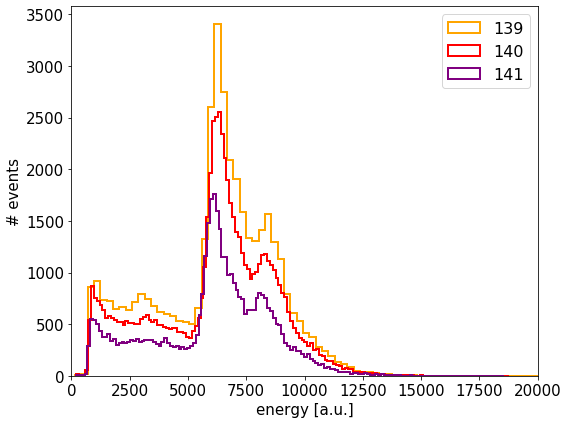

In [9]:
fig = plt.figure(figsize=(8,6))

# plt.hist(peak_basics_000137['area'],bins = 100, linewidth = 2, color = 'steelblue', label='137')
plt.hist(peak_basics_000139['area'],bins = 150,  histtype='step', linewidth = 2, color = 'orange', label='139')
plt.hist(peak_basics_000140['area'],bins = 150, histtype='step', linewidth = 2, color = 'red',  label='140')
plt.hist(peak_basics_000141['area'],bins = 150, histtype='step', linewidth = 2, color = 'purple',  label='141')

plt.xlabel('energy [a.u.]', fontsize=15)
plt.ylabel('# events', fontsize=15)

plt.xlim(0,20000)

# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(loc = 'upper right', fontsize=16)

# plt.savefig("first_injection.png")
plt.tight_layout()

plt.show()

## 3. Un-corrected Energy Spectrum


Let's select the coincidence events (look at the previous notebook for the definition).

In [10]:
# Coincidence events cut 
cut139 = peak_basics_000139['n_channels'] ==2

coinc_events139 = peak_basics_000139[cut139]

print(f'We had {len(peak_basics_000139)} and now we have {len(coinc_events139)}. We cut out {len(peak_basics_000139) - len(coinc_events139)} events')

We had 39817 and now we have 34030. We cut out 5787 events


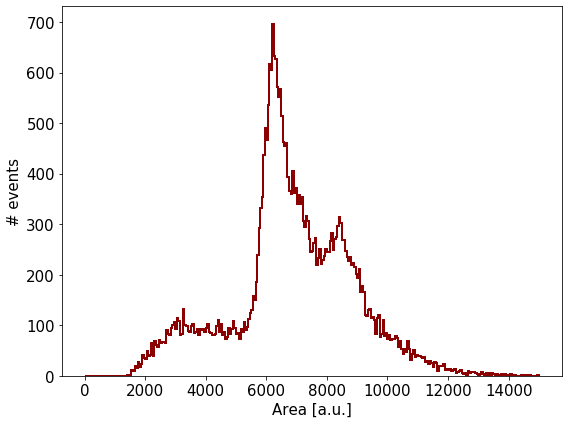

In [11]:
range_up = 15000
fig = plt.figure(figsize=(8,6))
bb = 300

plt.hist(coinc_events139['area'], bins = bb, histtype='step', linewidth = 2, color = 'darkred', range=(0,range_up))

plt.xlabel('Area [a.u.]',fontsize=15)
plt.ylabel('# events',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))

# plt.grid()

# plt.savefig("uncorrected_energy_spectrum141.png")

plt.tight_layout()

plt.show()


## 4. Energy Spectrum Correction using the Area Fraction Top Variable

For the correction we are going to construct a new variable called **Area Fraction Top** which can be defined as "the relative amount of light measured in the top plus the bottom array" (https://www.nikhef.nl/pub/services/biblio/theses_pdf/thesis_S_Breur.pdf)

Specs about the PMT connections are in https://wiki.nikhef.nl/xenon/doku.php?id=xamsl:pmts_connections

In [12]:
# Construct the Area Fraction Top Variable 
peaks_aft139 = []

for i in range(0, len(peaks_000139)):
    
    top_s1 = peaks_000139['area_per_channel'][i][1] # PMT 2 is the top PMT 
    bot_s1 = peaks_000139['area_per_channel'][i][0] # PMT 2 is the top PMT 
    if (top_s1 > 0) & (bot_s1 >0):
        peaks_aft139.append(top_s1/(bot_s1+top_s1))

# Define the coincidence event
conc_cut139 = []

for i in range(0, len(peaks_000139['area_per_channel'])):
    if (peaks_000139['area_per_channel'][i][0] > 0) & (peaks_000139['area_per_channel'][i][1]>0):
        conc_cut139.append(True)
    else:
        conc_cut139.append(False)
        
# Show the peaks with the coincidence cut 
coinc_peak139 = peaks_000139[conc_cut139]

print(f'We had {len(peaks_000139)} and now we have {len(coinc_peak139)}. We cut out {len(peaks_000139) - len(coinc_peak139)} events')

We had 39817 and now we have 34030. We cut out 5787 events


In [13]:
# Histogram of the Area Fraction Top 

# fig = plt.figure(figsize=(8,6))
# bb = 150

# plt.hist(peaks_aft139,bins = bb,histtype='step', color = 'darkgreen',linewidth = 2)

# plt.xlim(0,1)

# plt.xlabel('Area Fraction Top',fontsize=20)
# plt.ylabel('# events',fontsize=20)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)

# plt.tight_layout()

# # plt.savefig("aft_plot141.png")

# plt.show()

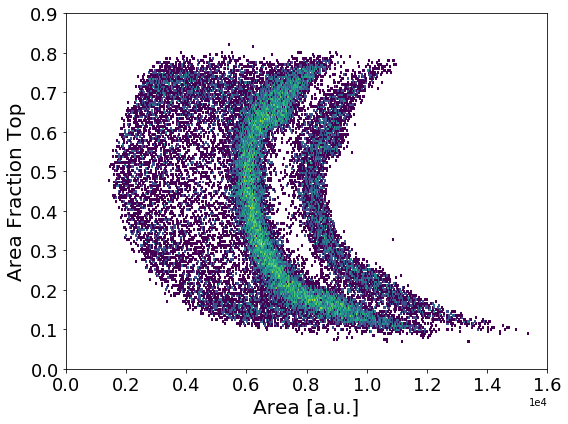

In [14]:
# 2-D plot of the coincident peaks and the area fraction top vairab
fig = plt.figure(figsize=(8,6))

plt.hist2d(coinc_peak139['area'], peaks_aft139, norm=LogNorm(), bins = (400, 150))

plt.ylim(0,0.9)
plt.xlim(0,16000)

# plt.colorbar()
plt.xlabel('Area [a.u.]',fontsize=20)
plt.ylabel('Area Fraction Top',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()

# plt.savefig("aft_area_plot141.png")

plt.show()

Since the alpha peaks are monoenergetic, we don't expect to see those bends at lower AFT values (bottom PMT) and higher AFT values (top array).

We need to correct the lines by finding a model that describe them: it is a double function model which seems to describe well the data, at least at this preliminary stage in Gas Xenon.

/home/xams/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


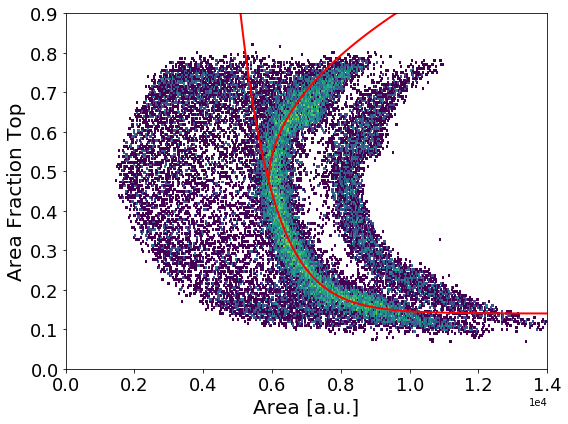

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

t = np.arange(0., 15000., 10)
# t1 = np.arange(0., 5875., 10)
t2 = np.arange(5890., 15000., 10)

plt.hist2d(coinc_peak139['area'], peaks_aft139, norm=LogNorm(), bins = (400, 150))

plt.plot(t,np.sqrt((t-5900)/2)/100+0.47,linewidth = 2,color = 'red')
plt.plot(t,0.5*np.exp(-0.001*(t-5500))+0.14,linewidth = 2, color = 'red')
# plt.plot(t1,0.5*np.exp(-0.001*(t1-5500))+0.14,linewidth = 2,color = 'black',linestyle='dashed')
# plt.plot(t2,0.5*np.exp(-0.001*(t2-5500))+0.14,linewidth = 2,color = 'red')


plt.ylim(0,0.9)
plt.xlim(0,14000)

# plt.colorbar()
plt.xlabel('Area [a.u.]',fontsize=20)
plt.ylabel('Area Fraction Top',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# props = dict(boxstyle='round',  alpha=0.6, color='darkorange')
# props2 = dict(boxstyle='round',  alpha=0.4, color='darkred')

# ax.text(0.68, 0.95, '~$\sqrt{x}$', transform=ax.transAxes, fontsize=20,
#          verticalalignment='top', bbox=props)
# ax.text(0.88, 0.25, '~$e^x$', transform=ax.transAxes, fontsize=20,
#          verticalalignment='top', bbox=props2)


# plt.savefig("aft_area_fit_141.png")

plt.tight_layout()

plt.show()

In [16]:
ref_point = 5900
ref_aft = 0.47
b_low = 0.14

def corr_func(aft):
    if aft >= ref_aft:
        return ref_point/(((aft-ref_aft)*100)**2*2+5900)
    if (aft < ref_aft) & (aft > b_low):
        return ref_point/(np.log((aft-b_low)*2)/(-0.001)+5500)
    if aft <= b_low:
        return ref_point/(np.log(((b_low+0.001)-b_low)*2)/(-0.001)+5500)

In [17]:
corr_peaks139 = []

for i in range(0,len(coinc_peak139)):
    new_area = coinc_peak139['area'][i]*corr_func(peaks_aft139[i])
    corr_peaks139.append(new_area)

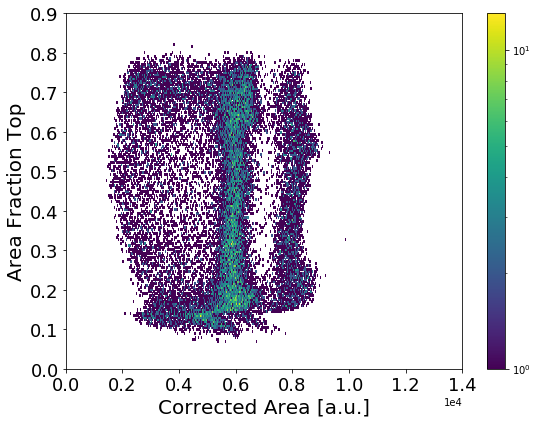

In [18]:
fig = plt.figure(figsize=(8,6))

plt.hist2d(corr_peaks139,peaks_aft139, norm=LogNorm(),bins = (500,150))

plt.ylim(0,0.9)
plt.xlim(0,14000)
plt.xlabel('Corrected Area [a.u.]',fontsize=20)
plt.ylabel('Area Fraction Top',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))
#plt.title('Event no.%i in ch0'%ii, fontsize = 18, loc ='left')
#plt.legend(loc = 'upper right',fontsize = 15)
plt.colorbar()
plt.tight_layout()

# plt.savefig("aft_area_plot_corrected141.png")

plt.show()

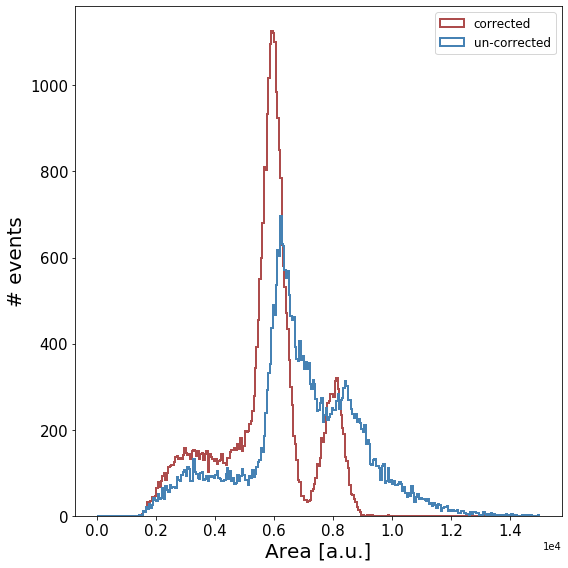

In [19]:
fig = plt.figure(figsize=(8,8))
bb = 300
range_up = 15000

hist_corr = plt.hist(corr_peaks139,bins = bb, histtype='step', color = 'darkred', 
         alpha=0.7, linewidth = 2, range=(0,range_up),label='corrected')
plt.hist(coinc_events139['area'], bins = bb, histtype='step', 
         linewidth = 2, color = 'steelblue', range=(0,range_up), label='un-corrected')
xx = hist_corr[1]
xx = xx[:-1]
yy = hist_corr[0]

plt.xlabel('Area [a.u.]',fontsize=20)
plt.ylabel('# events',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(loc = 'upper right',fontsize = 12)

# plt.savefig("corrected_energy_spectrum.png")

plt.tight_layout()

plt.show()

**TO-DO:** It would be nice to compare the corrected energy spectra all together of the three runs ``139``, ``140`` and ``141``.

_What do you see and can you explain why?_

## 5. Energy spectrum gaussian fit 

In [20]:
xr = hist_corr[1]
xr = xx[:-1]
yr = hist_corr[0]
xx = []
yy = []

lower_limit = 5000

for i in range(0,len(xr)):
    if xr[i] > lower_limit:
        xx.append(xr[i])
        yy.append(yr[i])
        
xx = np.array(xx)
yy = np.array(yy)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#data = hist1#np.genfromtxt('data.txt')
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset
def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3,offset1,offset2):
    a_off1 = np.heaviside((x-c1)*(-1), 1)*offset1
    a_off2 = np.heaviside((x-9000)*(-1),1)*offset2

    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + a_off1 + a_off2)

def two_gaussians(x, h1, c1, w1, h2, c2, w2,offset1,offset2):
    return three_gaussians(x, h1, c1, w1,  0,0,1,h2, c2, w2,offset1,offset2)

errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2
errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

# guess3 = [400, 5950, 300, 200, 6240, 300, 100, 8100, 200,0,0]  # I guess there are 3 peaks, 2 are clear, but between them there seems to be another one, based on the change in slope smoothness there
# guess2 = [400, 5900, 300, 100, 8100, 200,0,0]  # I removed the peak I'm not too sure about
guess2 = [400, 5800, 300, 100, 8100, 200,0,0]  # I removed the peak I'm not too sure about
# optim3, success = optimize.leastsq(errfunc3, guess3[:],  args=(xx, yy))
optim2, success = optimize.leastsq(errfunc2, guess2[:],  args=(xx, yy))

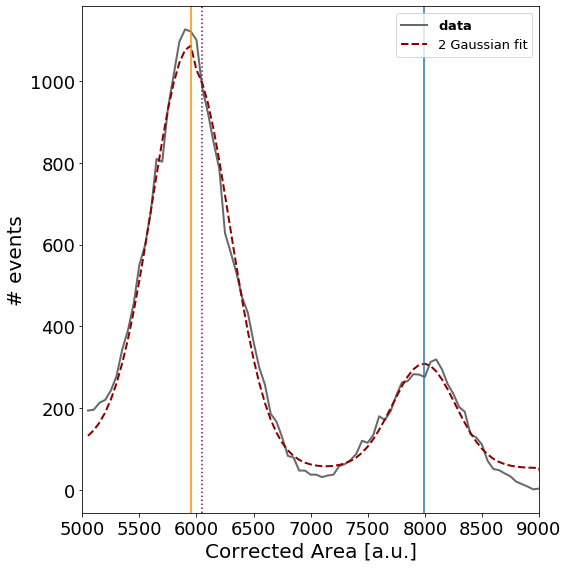

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(xx, yy, lw=2, color = 'dimgrey', label='$\\bf{data}$')
# plt.plot(xx, three_gaussians(xx, *optim3),lw=2, c='darkblue', label='3 Gaussian fit')
plt.plot(xx, two_gaussians(xx, *optim2), 'r--', lw=2, c='darkred', ls='--',label='2 Gaussian fit')
plt.legend(loc='best')

x_rn = optim2[1] 
x_po214 = optim2[4]

plt.axvline(x_rn, color='darkorange' )
plt.axvline(x_po214)
plt.axvline(6050, color='purple',linestyle='dotted')

ax.text(5500, 1500, 'Rn-222', fontsize=18, color='darkorange')
ax.text(11350, 1500, 'Po-218', fontsize=18, color='purple', alpha=0.9)
ax.text(12400, 400, 'Po-214', fontsize=18, color='steelblue')

plt.xlim(5000,9000)
# plt.ylim(1,10000)
# plt.yscale('log')
plt.xlabel('Corrected Area [a.u.]',fontsize=20)
plt.ylabel('# events',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,5))
#plt.title('Event no.%i in ch0'%ii, fontsize = 18, loc ='left')
plt.legend(loc = 'upper right',fontsize = 13)

plt.tight_layout()

# plt.savefig("energy_spectrum_fit.png")

plt.show()

In [23]:
optim2

array([ 984.94346296, 5950.0001532 ,  340.33894174,  255.63167501,
       7992.00847274,  276.66720977,   49.06242429,   53.10747777])

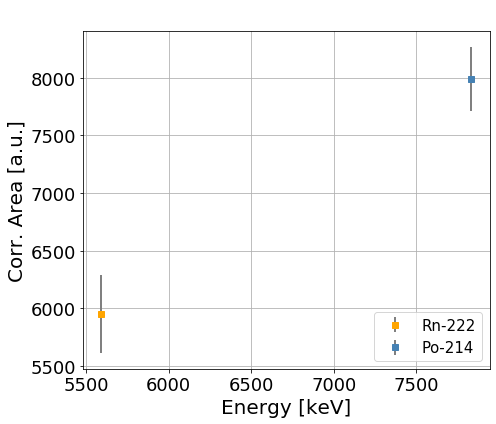

Corrected Area ratio: 1.3431946667166195, Literature ratio: 1.4012485689753864


In [24]:
fig, ax = plt.subplots(figsize=(7, 6))

rn222_energy = 5590.4 # keV
# po218_energy = 6114.75  # keV
po214_energy = 7833.54 # keV
# po210_energy = 5407.53 # keV

alpha_energies_keV = [rn222_energy, po214_energy]
alpha_energies_au = [x_rn, x_po214]
alpha_en_err = [optim2[2], optim2[5]] 

classes = ['Rn-222', 'Po-214']
colours = ['orange','steelblue']

for i in range(len(alpha_energies_keV)):
    ax.errorbar(alpha_energies_keV[i], alpha_energies_au[i], yerr=alpha_en_err[i], 
                label=classes[i], color=colours[i], ecolor='gray', elinewidth=2, fmt='s')

handles, classes = ax.get_legend_handles_labels()
# handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles] this is to avoid error bars in the points legend

ax.legend(handles, classes, loc='lower right', fontsize=15)

plt.title(' ', fontsize = 25)

plt.xlabel('Energy [keV]',fontsize=20)
plt.ylabel('Corr. Area [a.u.]',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

ax.grid(True)

plt.tight_layout()

#plt.savefig("cal_curve.png")

plt.show()

print(f'Corrected Area ratio: {x_po214/x_rn}, Literature ratio: {po214_energy/rn222_energy}')

**TO-DO**

It would be nice to have a table like Table 1 (https://wiki.nikhef.nl/xenon/doku.php?id=serena:first_results_xamsl) with the ratio calculated per each of the three runs. 

The error on the literature value depends on when you take the literature value of the Q-value for the two isotopes, you can cite directly the source of the values.